In [1]:
import pandas as pd

In [2]:
crashes_df = pd.read_csv('CHC_Crashes.csv')
#crashes_df

In [3]:
crashes_df['LANE_CNT'].dtype

dtype('float64')

In [4]:
crashes_1 = crashes_df.loc[(crashes_df['LANE_CNT'] <= 12)]
injuries = ['INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 
            'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 
            'INJURIES_INCAPACITATING', 'PHOTOS_TAKEN_I',
            'STATEMENTS_TAKEN_I', 'DOORING_I',
            'WORK_ZONE_I', 'WORK_ZONE_TYPE',
            'WORKERS_PRESENT_I', 'NOT_RIGHT_OF_WAY_I',
            'DATE_POLICE_NOTIFIED', 'LOCATION']

for item in injuries:
    del crashes_1[item]

In [5]:
crashes_1.columns

Index(['RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'HIT_AND_RUN_I', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [6]:
 day = crashes_1['CRASH_DAY_OF_WEEK'].value_counts()
day

6    26312
7    23731
3    23566
4    23410
5    23253
2    22600
1    19183
Name: CRASH_DAY_OF_WEEK, dtype: int64

In [7]:
weather = crashes_1.groupby(['WEATHER_CONDITION']).count()["RD_NO"]
weather

WEATHER_CONDITION
CLEAR                     130348
CLOUDY/OVERCAST             4764
FOG/SMOKE/HAZE               293
OTHER                        440
RAIN                       14660
SEVERE CROSS WIND GATE        35
SLEET/HAIL                   208
SNOW                        4870
UNKNOWN                     6437
Name: RD_NO, dtype: int64

In [8]:
crashes_num = len(crashes_1["RD_NO"].value_counts())
crashes_num
#weather_pct = weather / "RD_NO" * 100

162055

In [9]:
weather_pct = weather / crashes_num * 100
weather_pct

WEATHER_CONDITION
CLEAR                     80.434420
CLOUDY/OVERCAST            2.939743
FOG/SMOKE/HAZE             0.180803
OTHER                      0.271513
RAIN                       9.046311
SEVERE CROSS WIND GATE     0.021598
SLEET/HAIL                 0.128351
SNOW                       3.005153
UNKNOWN                    3.972108
Name: RD_NO, dtype: float64

In [10]:
lighting = crashes_1.groupby(['LIGHTING_CONDITION']).count()["RD_NO"]
lighting

LIGHTING_CONDITION
DARKNESS                    7738
DARKNESS, LIGHTED ROAD     34033
DAWN                        2501
DAYLIGHT                  107399
DUSK                        4838
UNKNOWN                     5546
Name: RD_NO, dtype: int64

In [11]:
lighting_pct = lighting / crashes_num * 100
lighting_pct

LIGHTING_CONDITION
DARKNESS                   4.774922
DARKNESS, LIGHTED ROAD    21.000895
DAWN                       1.543303
DAYLIGHT                  66.273179
DUSK                       2.985406
UNKNOWN                    3.422295
Name: RD_NO, dtype: float64

In [12]:
crash_type = crashes_1.groupby(['FIRST_CRASH_TYPE']).count()["RD_NO"]
crash_type

FIRST_CRASH_TYPE
ANGLE                           16778
ANIMAL                            107
FIXED OBJECT                     6298
HEAD ON                          1471
OTHER NONCOLLISION                569
OTHER OBJECT                     1247
OVERTURNED                         80
PARKED MOTOR VEHICLE            34510
PEDALCYCLIST                     2494
PEDESTRIAN                       3488
REAR END                        42314
SIDESWIPE OPPOSITE DIRECTION     2412
SIDESWIPE SAME DIRECTION        27495
TRAIN                               7
TURNING                         22785
Name: RD_NO, dtype: int64

In [13]:
crash_type_pct = crash_type / crashes_num * 100
crash_type_pct

FIRST_CRASH_TYPE
ANGLE                           10.353275
ANIMAL                           0.066027
FIXED OBJECT                     3.886335
HEAD ON                          0.907717
OTHER NONCOLLISION               0.351115
OTHER OBJECT                     0.769492
OVERTURNED                       0.049366
PARKED MOTOR VEHICLE            21.295239
PEDALCYCLIST                     1.538984
PEDESTRIAN                       2.152356
REAR END                        26.110888
SIDESWIPE OPPOSITE DIRECTION     1.488384
SIDESWIPE SAME DIRECTION        16.966462
TRAIN                            0.004320
TURNING                         14.060041
Name: RD_NO, dtype: float64

In [24]:
import gmaps

# Google developer API key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [25]:
crashes_1.shape

(162055, 34)

In [26]:
# Store latitude and longitude in locations
locations = crashes_1[["LATITUDE","LONGITUDE"]]

In [27]:
locations2 = locations.dropna()
locations2.head()

,LATITUDE,LONGITUDE
0,41.897595,-87.705161
1,41.764475,-87.663919
2,41.770234,-87.685437
4,41.953630,-87.649769
5,41.922073,-87.781887


In [28]:
locations2.shape

(161397, 2)

# BELOW IS ALL CRASHES MAP



In [29]:
# Customize the size of the figure. Below in the curlies is CSS, makes it pretty
figure_layout = {
    'width': '600px',
    'height': '1200px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
chicago_coords = (41.85,-87.64)

fig = gmaps.figure(center=chicago_coords, zoom_level=11)

In [30]:
# Assign the marker layer to a variable
#markers = gmaps.marker_layer(locations2)
heatmap_layer = gmaps.heatmap_layer(locations2)
#, fill_color='green', stroke_color='green', scale=2
heatmap_layer.max_intensity = 35
heatmap_layer.poin_radius = 2
# Add the layer to the map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# START FATAL INJURIES MAP


In [66]:
crashes3 = crashes_1[crashes_1.INJURIES_FATAL > 0 ]
crashes3.head()

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
1056,JB457663,NaN,10/01/2018 02:33:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,DIVIDED - W/MEDIAN (NOT RAISED),...,533.0,1.0,FATAL,1.0,1.0,2,2,10,41.659009,-87.617448
1074,JB457634,NaN,09/30/2018 11:59:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,...,123.0,1.0,FATAL,5.0,3.0,23,1,9,41.875260,-87.624397
1341,JB456319,NaN,09/29/2018 09:35:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,UNKNOWN,"DARKNESS, LIGHTED ROAD",TURNING,CENTER TURN LANE,...,2511.0,2.0,FATAL,1.0,1.0,21,7,9,41.930906,-87.806351
3373,JB447920,NaN,09/23/2018 05:20:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDALCYCLIST,DIVIDED - W/MEDIAN (NOT RAISED),...,1711.0,2.0,FATAL,1.0,1.0,17,1,9,41.997237,-87.711798
11851,JB413222,NaN,08/29/2018 04:06:00 AM,35,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,...,1432.0,1.0,FATAL,3.0,1.0,4,4,8,41.933187,-87.687778


In [67]:
crashes3.shape

(155, 34)

In [68]:
locations = crashes3[["LATITUDE","LONGITUDE"]]

In [69]:
# Customize the size of the figure. Below in the curlies is CSS, makes it pretty
figure_layout = {
    'width': '800px',
    'height': '900px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [70]:
# Assign the marker layer to a variable
#markers = gmaps.marker_layer(locations2)
crashes_layer = gmaps.symbol_layer(
    locations, fill_color='green', stroke_color='green', scale=2
)
# Add the layer to the map
fig.add_layer(crashes_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='900px', margin='0 auto 0 auto', padding='1px', wi…

# DAY AND HOUR HEATMAP

In [14]:
day_hour = crashes_1.groupby(['CRASH_DAY_OF_WEEK','CRASH_HOUR']).count()["RD_NO"]
day_hour.head()

CRASH_DAY_OF_WEEK  CRASH_HOUR
1                  0             879
                   1             822
                   2             800
                   3             687
                   4             509
Name: RD_NO, dtype: int64

In [15]:
day_hour2 = day_hour.reset_index()


In [16]:
day_hour2.head()

,CRASH_DAY_OF_WEEK,CRASH_HOUR,RD_NO
0,1,0,879
1,1,1,822
2,1,2,800
3,1,3,687
4,1,4,509


In [17]:
#day_hour.rename(index=str,columns={"CRASH_DAY_OF_WEEK":"Day of Week","CRASH_HOUR":"Hour", "RD_NO":"# of Crashes"})

In [18]:
import seaborn as sns
import numpy as np
%matplotlib inline

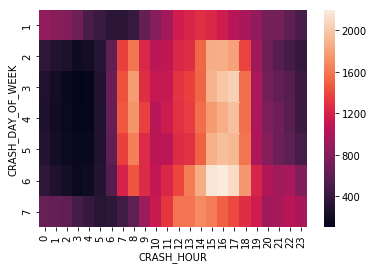

In [19]:
heatmap_df = day_hour2.pivot('CRASH_DAY_OF_WEEK','CRASH_HOUR','RD_NO')
display_heatmap = sns.heatmap(heatmap_df)

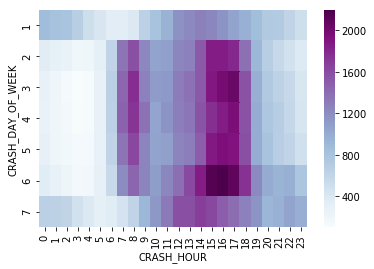

In [23]:
display_heatmap = sns.heatmap(heatmap_df, cmap="BuPu")
# Save the figure
#display_heatmap.savefig("DayvHour.png")

# Weather vs Lighting Heatmap

In [59]:
weatherVlighting = crashes_1.groupby(['WEATHER_CONDITION','LIGHTING_CONDITION']).count()["RD_NO"]
weatherVlighting.head()

WEATHER_CONDITION  LIGHTING_CONDITION    
CLEAR              DARKNESS                   5800
                   DARKNESS, LIGHTED ROAD    26519
                   DAWN                       1854
                   DAYLIGHT                  91187
                   DUSK                       3696
Name: RD_NO, dtype: int64

In [60]:
weatherVlighting = weatherVlighting.reset_index()

In [61]:
weatherVlighting.head()

,WEATHER_CONDITION,LIGHTING_CONDITION,RD_NO
0,CLEAR,DARKNESS,5800
1,CLEAR,"DARKNESS, LIGHTED ROAD",26519
2,CLEAR,DAWN,1854
3,CLEAR,DAYLIGHT,91187
4,CLEAR,DUSK,3696


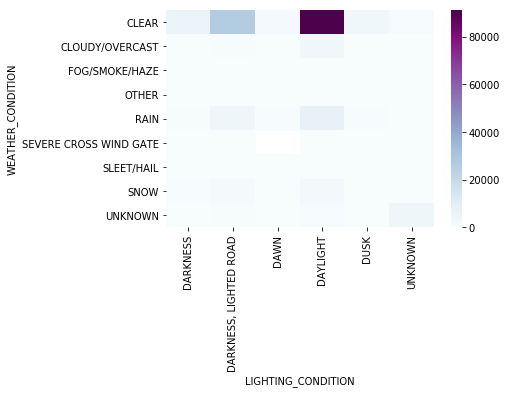

In [63]:
heatmap2_df = weatherVlighting.pivot('WEATHER_CONDITION','LIGHTING_CONDITION','RD_NO')
display_heatmap = sns.heatmap(heatmap2_df,cmap="BuPu")
# Save the figure
#?plt.savefig("WeathervLighting.png")